In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.lookandcompare import transform_info, transform_headtail, to_doc_info, to_doc_headtail 

dfflight = pd.read_csv('csv/c-flight-activity.csv')
dfloyalty = pd.read_csv('csv/c-loyalty-history.csv')


In [5]:
dfflight.shape

(405624, 10)

In [6]:
dfloyalty.shape

(16737, 16)

In [7]:
dfflight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
dfloyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [9]:
round(dfflight.isna().sum()/dfflight.shape[0]*100, 2)

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [10]:
round(dfloyalty.isna().sum()/dfloyalty.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [11]:
print(to_doc_headtail(dfflight,'Loyalty Number'))


|    dtype: int64  |   Loyalty Number   |
|-----------|---------------|
||Top 5:
||678205ㅤㅤ0.02%
||499874ㅤㅤ0.01%
||411734ㅤㅤ0.01%
||255475ㅤㅤ0.01%
||528447ㅤㅤ0.01%
||Bottom 5:
||100590ㅤㅤ0.01%
||100642ㅤㅤ0.01%
||100644ㅤㅤ0.01%
||100646ㅤㅤ0.01%
||999891ㅤㅤ0.01%<br><br>Valores únicos: **16737**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **388887**|
---



In [12]:
print(to_doc_headtail(dfloyalty,'Loyalty Number'))


|    dtype: int64  |   Loyalty Number   |
|-----------|---------------|
||Top 5:
||480934ㅤㅤ0.01%
||549612ㅤㅤ0.01%
||429460ㅤㅤ0.01%
||608370ㅤㅤ0.01%
||530508ㅤㅤ0.01%
||Bottom 5:
||823768ㅤㅤ0.01%
||680886ㅤㅤ0.01%
||776187ㅤㅤ0.01%
||906428ㅤㅤ0.01%
||652627ㅤㅤ0.01%<br><br>Valores únicos: **16737**<br>Número de registros: **16737**<br>Valores nulos: **0**<br>Registros duplicados: **0**|
---



In [13]:
vuelos_por_cliente = dfflight['Loyalty Number'].value_counts()
print(f'El máximo número de vuelos por cliente es: {vuelos_por_cliente.max()}')
print(f'El mínimo número de vuelos por cliente es: {vuelos_por_cliente.min()}')


# Vamos a ver la concentración de vuelos por cliente
frecuencia = vuelos_por_cliente.value_counts().sort_index()
frecuencia 



El máximo número de vuelos por cliente es: 72
El mínimo número de vuelos por cliente es: 24


count
24    16574
48      162
72        1
Name: count, dtype: int64

In [14]:
# Dado que hay un 48,81% de clientes que no han reservado vueltos
# y por lo tanto, no han volado distancia, los excluimos para calcular
# media y mediana

media_distancia = dfflight[dfflight['Distance'] != 0]['Distance'].mean()

mediana_distancia = dfflight[dfflight['Distance'] != 0]['Distance'].median()

print(mediana_distancia)

print(media_distancia)

# Nos quedamos con la mediana porque representa el valor central real del grupo, sin importar los extremos.

2298.0
2361.633876281113


In [15]:
print(to_doc_headtail(dfflight, 'Points Accumulated'))


|    dtype: float64  |   Points Accumulated   |
|-----------|---------------|
||Top 5:
||0.0ㅤㅤ48.81%
||180.0ㅤㅤ0.19%
||270.0ㅤㅤ0.18%
||288.0ㅤㅤ0.18%
||189.0ㅤㅤ0.17%
||Bottom 5:
||649.5ㅤㅤ0.0%
||471.96ㅤㅤ0.0%
||565.5ㅤㅤ0.0%
||474.12ㅤㅤ0.0%
||556.25ㅤㅤ0.0%<br><br>Valores únicos: **1549**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **404075**|
---



In [99]:
def median_a(df, column, unwantedvalue):
    median = df[df[column] != unwantedvalue][column].median()
    mean = df[df[column] != unwantedvalue][column].mean()

    print(f'Median -> {column}: {median}\nMean -> {column}: {mean}')


median_a(dfflight,'Points Accumulated', 0.0)

Median -> Points Accumulated: 235.0
Mean -> Points Accumulated: 241.64259964745318


In [17]:
print(to_doc_headtail(dfflight, 'Points Redeemed'))


|    dtype: int64  |   Points Redeemed   |
|-----------|---------------|
||Top 5:
||0ㅤㅤ94.04%
||447ㅤㅤ0.03%
||523ㅤㅤ0.02%
||443ㅤㅤ0.02%
||516ㅤㅤ0.02%
||Bottom 5:
||858ㅤㅤ0.0%
||869ㅤㅤ0.0%
||834ㅤㅤ0.0%
||859ㅤㅤ0.0%
||862ㅤㅤ0.0%<br><br>Valores únicos: **587**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **405037**|
---



In [18]:
registros_puntos_r = dfflight['Points Redeemed'].value_counts()

registros_puntos_r

Points Redeemed
0      381443
447       103
523       100
443        98
516        97
        ...  
858         1
869         1
834         1
859         1
862         1
Name: count, Length: 587, dtype: int64

In [19]:
top_redimidores = dfflight[dfflight['Points Redeemed'] > 200]
print(f'El número de clientes que usa sus puntos es: {top_redimidores['Loyalty Number'].nunique()}\n')

# Agrupamos por 'Loyalty Number' para sumar los puntos redimidos por cada ID única
redenciones_por_cliente = dfflight.groupby('Loyalty Number')['Points Redeemed'].sum().reset_index()

# Filtramos clientes que redimieron más de 200 puntos en total
top_redimidores = redenciones_por_cliente[redenciones_por_cliente['Points Redeemed'] > 200]

# Mostrar los resultados
top_redimidores.sort_values(by='Points Redeemed', ascending=False)

El número de clientes que usa sus puntos es: 11560



,Loyalty Number,Points Redeemed
8162,539704,4479
2088,211755,4336
6285,438707,4301
11114,696609,4282
3337,279419,4221
...,...,...
2488,235454,293
5232,382671,292
15059,909066,291
10905,685314,291


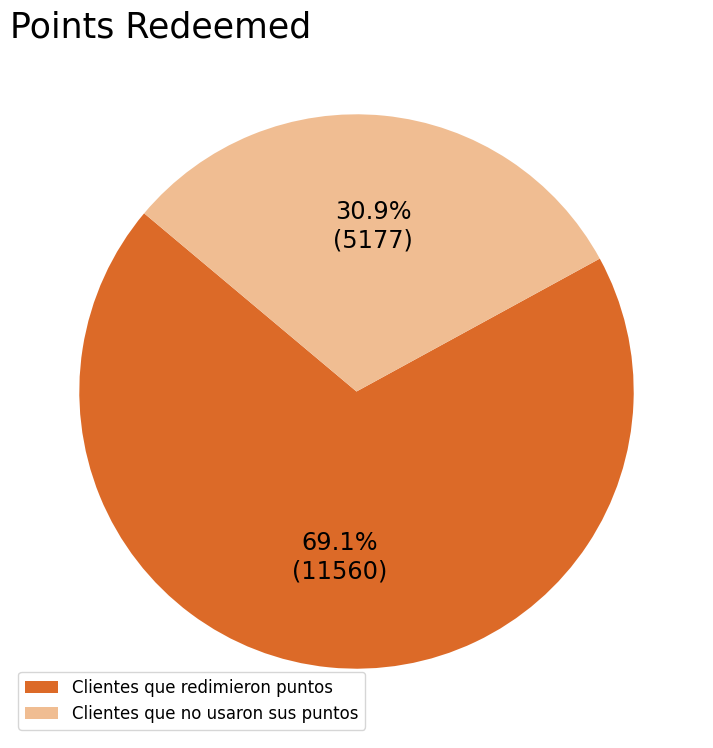

In [87]:
# Datos
clientes_con_redencion = 11560
clientes_sin_redencion = 16737 - clientes_con_redencion
labels = ['Clientes que redimieron puntos', 'Clientes que no usaron sus puntos']
values = [clientes_con_redencion, clientes_sin_redencion]
colors = ["#dc6a28", "#f0bd92"]

# Crear gráfico de pastel con tamaño de letra grande
plt.figure(figsize=(9,9))
plt.pie(values, autopct=make_autopct(values),
        startangle=140, colors=colors, textprops={'size': 'xx-large', 'weight': 'normal'})
plt.legend(labels, loc="lower left", fontsize='large')
plt.title('Points Redeemed', fontsize=25, loc = 'left')
plt.show()


In [40]:
print(to_doc_info(dfloyalty, 'Education'))


|    dtype: object  |   Education   |
|-----------|---------------|
||Bachelorㅤㅤ62.59
||Collegeㅤㅤ25.32
||High School or Belowㅤㅤ4.67
||Doctorㅤㅤ4.39
||Masterㅤㅤ3.04<br><br>Valores únicos: **5**<br>Número de registros: **16737**<br>Valores nulos: **0**<br>Registros duplicados: **16732**



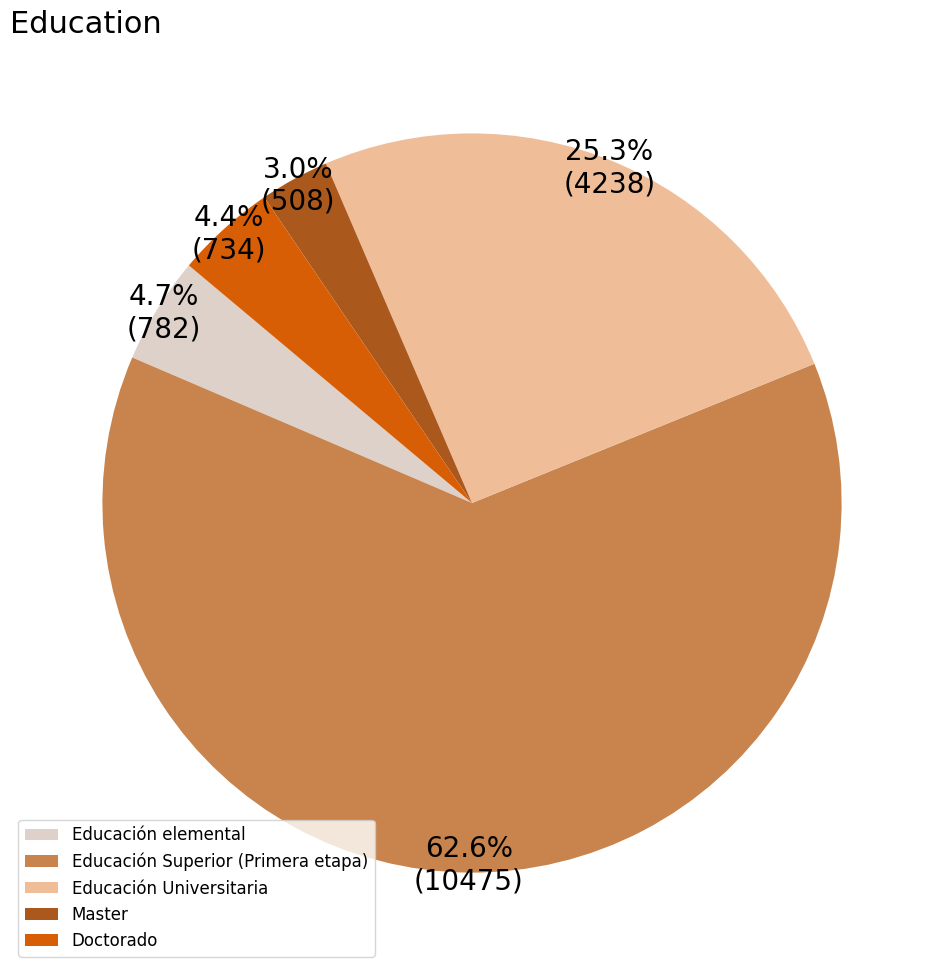

In [149]:
bachelor = (dfloyalty['Education'] == 'Bachelor').sum()
college = (dfloyalty['Education'] == 'College').sum()
low = (dfloyalty['Education'] == 'High School or Below').sum()
doctor = (dfloyalty['Education'] == 'Doctor').sum()
master = (dfloyalty['Education'] == 'Master').sum()

# Lista de valores numéricos
values = [low, bachelor, college, master, doctor]
labels = ['Educación elemental', 'Educación Superior (Primera etapa)', 'Educación Universitaria', 'Master', 'Doctorado']
colors = ["#ded1c9", "#c8844c", "#f0bd99", "#ab581d", "#d85e06"]

# Crear gráfico de pastel
plt.figure(figsize=(12, 12))
plt.pie(values, autopct=make_autopct(values), startangle=140, colors=colors, textprops={'size': 20, 'weight': 'normal'},
        pctdistance=0.98,  # Acercar porcentajes al centro
        )

plt.legend(labels, loc="best", fontsize='large')
plt.title('Education', fontsize=22, loc='left')
plt.show()

In [96]:
print(to_doc_headtail(dfloyalty, 'CLV'))


|    dtype: float64  |   CLV   |
|-----------|---------------|
||Top 5:
||8564.77ㅤㅤ0.08%
||7582.11ㅤㅤ0.07%
||5380.9ㅤㅤ0.07%
||10972.07ㅤㅤ0.07%
||5332.46ㅤㅤ0.07%
||Bottom 5:
||37939.49ㅤㅤ0.01%
||36168.34ㅤㅤ0.01%
||33288.16ㅤㅤ0.01%
||31864.86ㅤㅤ0.01%
||31758.35ㅤㅤ0.01%<br><br>Valores únicos: **7984**<br>Número de registros: **16737**<br>Valores nulos: **0**<br>Registros duplicados: **8753**|
---



In [100]:
median_a(dfloyalty, 'CLV', 0.0)

Median -> CLV: 5780.18
Mean -> CLV: 7988.896535818844


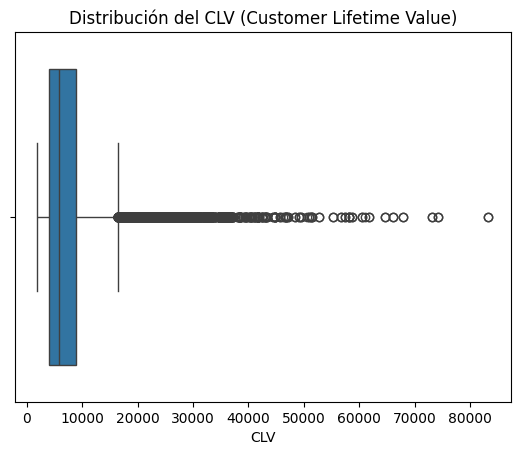

In [103]:

sns.boxplot(x=dfloyalty['CLV'])
plt.title('Distribución del CLV (Customer Lifetime Value)')
plt.show()


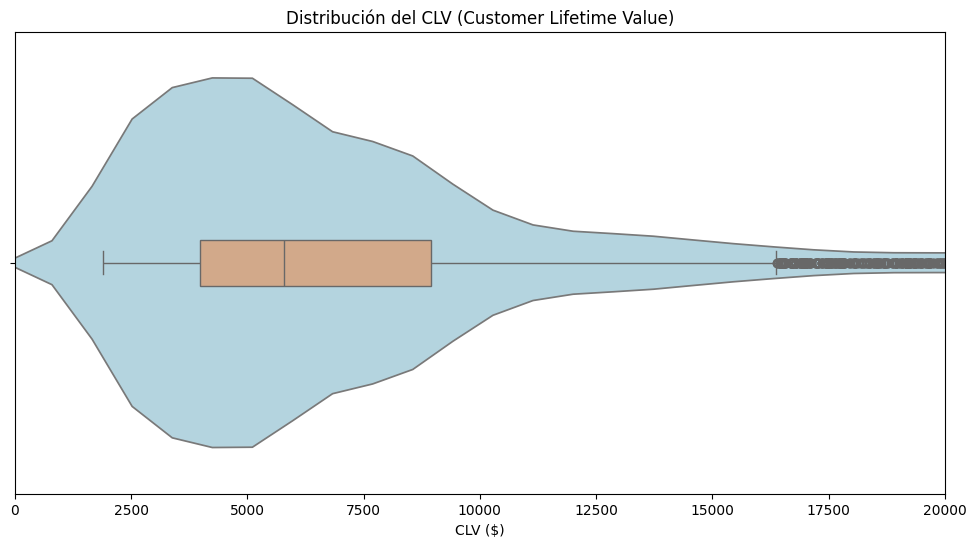

In [106]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=dfloyalty['CLV'], color='lightblue', inner=None)  # Sin caja interna
sns.boxplot(x=dfloyalty['CLV'], width=0.1, color="#dea77ef8")  # Boxplot superpuesto
plt.title('Distribución del CLV (Customer Lifetime Value)')
plt.xlabel('CLV ($)')
plt.xlim(0, 20000)
plt.show()


In [109]:
print(to_doc_info(dfloyalty, 'Enrollment Year'))


|    dtype: int64  |   Enrollment Year   |
|-----------|---------------|
||2018ㅤㅤ17.98
||2017ㅤㅤ14.86
||2016ㅤㅤ14.67
||2013ㅤㅤ14.32
||2014ㅤㅤ14.16
||2015ㅤㅤ13.93
||2012ㅤㅤ10.07<br><br>Valores únicos: **7**<br>Número de registros: **16737**<br>Valores nulos: **0**<br>Registros duplicados: **16730**



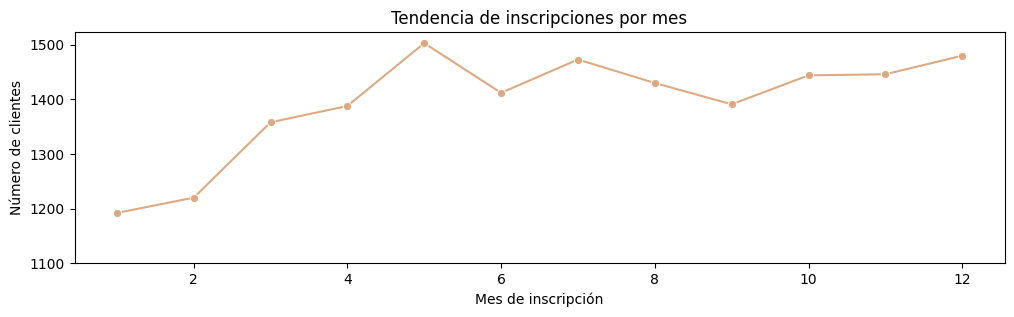

In [141]:
enrollment_counts = dfloyalty['Enrollment Month'].value_counts().sort_index()

plt.figure(figsize=(12, 3))
sns.lineplot(x=enrollment_counts.index, y=enrollment_counts.values, marker='o', color="#dea77ef8")
plt.title('Tendencia de inscripciones por mes')
plt.xlabel('Mes de inscripción')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.ylim(1100, enrollment_counts.max() + 20)  # Empieza en 1100 para reducir el espacio vacío
plt.show()



In [148]:
print(to_doc_info(dfloyalty,'Cancellation Month'))


|    dtype: float64  |   Cancellation Month   |
|-----------|---------------|
||nanㅤㅤ87.65
||12.0ㅤㅤ1.27
||11.0ㅤㅤ1.27
||8.0ㅤㅤ1.24
||7.0ㅤㅤ1.11
||10.0ㅤㅤ1.08
||9.0ㅤㅤ1.05
||6.0ㅤㅤ0.99
||1.0ㅤㅤ0.93
||3.0ㅤㅤ0.89
||5.0ㅤㅤ0.88
||2.0ㅤㅤ0.83
||4.0ㅤㅤ0.81<br><br>Valores únicos: **12**<br>Número de registros: **16737**<br>Valores nulos: **14670**<br>Registros duplicados: **16725**



In [150]:
median_a(dfloyalty, 'Salary', 0.0)

Median -> Salary: 73455.0
Mean -> Salary: 79245.6094087527


In [155]:
dfloyalty['Salary'].isnull().sum()

np.int64(4238)